In [1]:
#Loading dataset
import pandas as pd
import numpy as np

df = pd.read_csv(
    "C:\\Users\\aswat\\Downloads\\doc\\Indian Urban Air Quality and Health Impact 2019-2024.csv",
    encoding='latin1'
)

In [3]:
# Number of rows and columns in the dataset:
df.shape

(10000, 16)

In [4]:
# Datatypes of each column:
df.dtypes

City                          object
AQI                            int64
PM2.5                        float64
PM10                         float64
NO2                          float64
CO                           float64
SO2                          float64
O3                           float64
Temperature (°C)             float64
Humidity (%)                 float64
Wind Speed (km/h)            float64
Rainfall (mm)                float64
Pressure (hPa)               float64
Vehicle Count                  int64
Industrial Activity Index    float64
Health Impact Score            int64
dtype: object

In [47]:
# Initial observations: Printing first five rows
print(df.head())

        City  AQI       PM2.5        PM10        NO2        CO        SO2  \
0     Rajkot   59  227.411137  160.372399  44.820603  5.985617  37.125197   
1  Bangalore  443  219.714245  279.801260  78.175010  5.061981  27.136555   
2     Bhopal   56   94.849259  262.324427  70.018054  6.589327  34.627094   
3   Srinagar  342  120.983288  213.374289  71.842615  4.443049  32.297618   
4  Hyderabad  492  184.262288  165.108731  16.167775  0.553949   6.722572   

          O3  Temperature (°C)  Humidity (%)  Wind Speed (km/h)  \
0  58.063991         11.923333     64.424980          12.921405   
1  40.777526         16.738252     23.112364          19.405409   
2  42.726937         30.388482     63.634393          13.412998   
3  97.020499         32.694605     69.655615          19.225225   
4  22.823065         12.514916     93.221730          10.368030   

   Rainfall (mm)  Pressure (hPa)  Vehicle Count  Industrial Activity Index  \
0      14.473955      976.426573         198941         

In [48]:
# Initial observations: Concise summary
df.info

<bound method DataFrame.info of            City  AQI       PM2.5        PM10        NO2        CO        SO2  \
0        Rajkot   59  227.411137  160.372399  44.820603  5.985617  37.125197   
1     Bangalore  443  219.714245  279.801260  78.175010  5.061981  27.136555   
2        Bhopal   56   94.849259  262.324427  70.018054  6.589327  34.627094   
3      Srinagar  342  120.983288  213.374289  71.842615  4.443049  32.297618   
4     Hyderabad  492  184.262288  165.108731  16.167775  0.553949   6.722572   
...         ...  ...         ...         ...        ...       ...        ...   
9995      Surat  450   15.433569   89.388417  53.992515  5.748439   7.366889   
9996       Agra  458  133.323949  265.395350  78.288851  1.041756  34.305148   
9997     Bhopal  498  206.465595  231.293178  33.301249  6.648170  42.270406   
9998      Thane  108   37.637062   97.265740  14.254601  2.831116  22.218587   
9999       Pune  257  126.135867  114.065100  55.072024  7.857973  28.394120   

       

In [49]:
# Initial observations: Descriptive statistics
df.describe

<bound method NDFrame.describe of            City  AQI       PM2.5        PM10        NO2        CO        SO2  \
0        Rajkot   59  227.411137  160.372399  44.820603  5.985617  37.125197   
1     Bangalore  443  219.714245  279.801260  78.175010  5.061981  27.136555   
2        Bhopal   56   94.849259  262.324427  70.018054  6.589327  34.627094   
3      Srinagar  342  120.983288  213.374289  71.842615  4.443049  32.297618   
4     Hyderabad  492  184.262288  165.108731  16.167775  0.553949   6.722572   
...         ...  ...         ...         ...        ...       ...        ...   
9995      Surat  450   15.433569   89.388417  53.992515  5.748439   7.366889   
9996       Agra  458  133.323949  265.395350  78.288851  1.041756  34.305148   
9997     Bhopal  498  206.465595  231.293178  33.301249  6.648170  42.270406   
9998      Thane  108   37.637062   97.265740  14.254601  2.831116  22.218587   
9999       Pune  257  126.135867  114.065100  55.072024  7.857973  28.394120   

     

In [50]:
# Data pre-processing: Handling missing values
df.isnull().values.any()

np.False_

In [51]:
# Identifying column with missing data
df.isnull().sum()

City                         0
AQI                          0
PM2.5                        0
PM10                         0
NO2                          0
CO                           0
SO2                          0
O3                           0
Temperature (°C)             0
Humidity (%)                 0
Wind Speed (km/h)            0
Rainfall (mm)                0
Pressure (hPa)               0
Vehicle Count                0
Industrial Activity Index    0
Health Impact Score          0
dtype: int64

In [52]:
# Data pre-processing: Removing duplicates
df.duplicated().sum()

np.int64(0)

#### Creating derived column:
#### Air Quality Index - Interpretation of health concern: 
##### Based on the AQI value, a derived column 'Levels of Health concern' is created. This helps to analyze the health impact on the Indian urban population upon exposure.
##### AQI 0-50 Good
##### AQI 51-100 Moderate
##### AQI 101-150 Unhealthy for sensitive groups
##### AQI 151-200 Unhealthy
##### AQI 201-300 Very Unhealthy
##### AQI 301-500 Hazardous

In [56]:
# Data pre-processing: Creating derived columns

# Define conditions
conditions = [
    (df['AQI'] >= 0) & (df['AQI'] <= 50),
    (df['AQI'] >= 51) & (df['AQI'] <= 100),
    (df['AQI'] >= 101) & (df['AQI'] <= 150),
    (df['AQI'] >= 151) & (df['AQI'] <= 200),
    (df['AQI'] >= 201) & (df['AQI'] <= 300),
    (df['AQI'] >= 301) & (df['AQI'] <= 500)
]

# Define choices
choices = ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very unhealthy', 'Hazardous']

# Create new derived column
df['Levels of Health Concern'] = np.select(conditions, choices, default='Unknown')

print(df)

           City  AQI       PM2.5        PM10        NO2        CO        SO2  \
0        Rajkot   59  227.411137  160.372399  44.820603  5.985617  37.125197   
1     Bangalore  443  219.714245  279.801260  78.175010  5.061981  27.136555   
2        Bhopal   56   94.849259  262.324427  70.018054  6.589327  34.627094   
3      Srinagar  342  120.983288  213.374289  71.842615  4.443049  32.297618   
4     Hyderabad  492  184.262288  165.108731  16.167775  0.553949   6.722572   
...         ...  ...         ...         ...        ...       ...        ...   
9995      Surat  450   15.433569   89.388417  53.992515  5.748439   7.366889   
9996       Agra  458  133.323949  265.395350  78.288851  1.041756  34.305148   
9997     Bhopal  498  206.465595  231.293178  33.301249  6.648170  42.270406   
9998      Thane  108   37.637062   97.265740  14.254601  2.831116  22.218587   
9999       Pune  257  126.135867  114.065100  55.072024  7.857973  28.394120   

             O3  Temperature (°C)  Humi

#### Creating derived column:
#### Classifying the Indian cities into North, South, East and West regions

In [57]:
# Data pre-processing: Creating derived columns, Regions of India

region_map = {
    "Delhi": "North", "Lucknow": "North", "Varanasi": "North",
    "Agra": "North", "Meerut": "North", "Jaipur": "North",
    "Srinagar": "North", "Ludhiana": "North",
    
    "Bangalore": "South", "Hyderabad": "South", "Chennai": "South",
    
    "Kolkata": "East", "Patna": "East",
    
    "Rajkot": "West", "Vadodara": "West", "Surat": "West",
    "Ahmedabad": "West", "Indore": "West", "Bhopal": "West",
    "Nagpur": "West", "Nashik": "West", "Thane": "West",
    "Mumbai": "West", "Pune": "West"
}

df["Region"] = df["City"].map(region_map)

print(df)

           City  AQI       PM2.5        PM10        NO2        CO        SO2  \
0        Rajkot   59  227.411137  160.372399  44.820603  5.985617  37.125197   
1     Bangalore  443  219.714245  279.801260  78.175010  5.061981  27.136555   
2        Bhopal   56   94.849259  262.324427  70.018054  6.589327  34.627094   
3      Srinagar  342  120.983288  213.374289  71.842615  4.443049  32.297618   
4     Hyderabad  492  184.262288  165.108731  16.167775  0.553949   6.722572   
...         ...  ...         ...         ...        ...       ...        ...   
9995      Surat  450   15.433569   89.388417  53.992515  5.748439   7.366889   
9996       Agra  458  133.323949  265.395350  78.288851  1.041756  34.305148   
9997     Bhopal  498  206.465595  231.293178  33.301249  6.648170  42.270406   
9998      Thane  108   37.637062   97.265740  14.254601  2.831116  22.218587   
9999       Pune  257  126.135867  114.065100  55.072024  7.857973  28.394120   

             O3  Temperature (°C)  Humi

#### Filtering data to display cities which are in the AQI range 0-50:
##### This filtered data explores the Indian cities where residents have safest air exposure.

In [70]:
# Data pre-processing: Filtering data

Good_air_quality_df = df[df['AQI'] <= 50]
Good_air_quality_df

,City,AQI,PM2.5,PM10,NO2,CO,SO2,O3,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa),Vehicle Count,Industrial Activity Index,Health Impact Score,Region,Levels of Health Concern
714,Meerut,50,62.063391,32.672185,55.458509,7.142474,3.662746,79.766623,16.511200,41.544774,5.098129,231.129142,1039.339210,51142,5.801545,10,North,Good
1200,Indore,50,210.387449,44.038713,15.479956,9.652650,8.507138,47.202056,37.794528,97.516858,19.707560,279.716780,990.407371,113871,3.376549,10,West,Good
1661,Patna,50,37.841088,293.035502,15.754606,9.039945,13.425680,88.536972,20.093587,47.131010,16.438281,135.284654,988.550394,470880,0.833890,10,East,Good
1757,Meerut,50,11.661929,157.441937,57.200843,8.472263,36.421269,63.877745,38.509609,57.690011,13.613763,169.981324,1010.063834,69386,1.803360,10,North,Good
1971,Nagpur,50,240.572306,122.021214,52.965825,3.581324,32.638923,41.888578,12.221510,24.296825,1.674284,132.275578,972.825702,296351,9.699434,10,West,Good
2101,Jaipur,50,82.134990,261.912834,51.565326,7.022775,30.373598,45.894172,13.194770,27.353024,13.733681,117.905625,954.684936,307015,1.523166,10,North,Good
2711,Bhopal,50,35.954186,158.510124,69.601179,3.982530,31.598272,60.453029,44.033626,92.485406,0.963609,291.192447,1020.321859,114758,6.270569,10,West,Good
5608,Surat,50,112.480577,238.973261,6.993355,0.223861,29.918871,14.606302,27.603186,53.003726,15.923115,285.684403,1027.473897,375556,5.797049,10,West,Good
8719,Pune,50,203.187316,61.474172,42.674267,8.165940,31.491307,6.039632,39.350999,77.469789,17.044069,137.792075,1043.355852,15488,2.650432,10,West,Good
8911,Ahmedabad,50,169.063196,143.518835,33.881914,5.853279,7.874523,27.870441,10.373589,66.273664,17.473161,138.516678,1048.788494,468543,2.917191,10,West,Good


#### Filtering data to display cities which are in the AQI range 51-100:
##### This filtered data explores the Indian cities where residents have moderately safe air exposure.

In [59]:
# Data pre-processing: Filtering data

Moderate_air_quality_df = df[df['Levels of Health Concern'] == 'Moderate']
Moderate_air_quality_df

,City,AQI,PM2.5,PM10,NO2,CO,SO2,O3,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa),Vehicle Count,Industrial Activity Index,Health Impact Score,Region,Levels of Health Concern
0,Rajkot,59,227.411137,160.372399,44.820603,5.985617,37.125197,58.063991,11.923333,64.424980,12.921405,14.473955,976.426573,198941,4.862272,10,West,Moderate
2,Bhopal,56,94.849259,262.324427,70.018054,6.589327,34.627094,42.726937,30.388482,63.634393,13.412998,194.360799,984.562478,430785,3.799079,10,West,Moderate
10,Nashik,79,91.421855,257.739378,71.213980,7.801445,45.936684,29.198678,37.854670,97.733711,19.720412,102.316192,1018.006450,44237,8.801682,10,West,Moderate
16,Rajkot,64,121.941698,269.892110,7.937886,2.519702,14.796052,62.783803,38.354071,69.640546,5.248948,65.752010,967.471382,213342,8.204932,10,West,Moderate
18,Patna,93,91.755235,203.140618,31.120978,0.356862,33.554885,13.389734,26.915936,65.824744,16.217828,219.046799,1044.948564,495231,5.852868,10,East,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,Patna,91,217.857139,50.252323,55.404751,2.541672,17.603987,22.956250,43.247353,65.684795,5.484585,132.135730,1035.503003,403971,1.167424,10,East,Moderate
9962,Ahmedabad,52,104.630820,72.381002,26.873324,2.672988,5.469837,68.063967,10.630671,30.044167,17.809850,139.352269,1029.360365,491711,5.495452,10,West,Moderate
9974,Pune,88,175.225467,178.647445,30.037154,9.637272,3.148943,81.898784,14.627076,67.129767,5.055684,232.287607,974.495438,181894,4.585259,10,West,Moderate
9984,Kolkata,83,216.908659,185.030369,45.189458,3.248138,47.198468,37.807778,19.586278,21.670957,9.564535,249.061466,957.060045,489106,0.853603,10,East,Moderate


#### Filtering data to display cities which are in the AQI range 301-500:
##### This filtered data explores the Indian cities where residents have the most hazardous air exposure.

In [60]:
# Data pre-processing: Filtering data
Hazardous_air_quality_df = df[df['Levels of Health Concern'] == 'Hazardous']
Hazardous_air_quality_df

,City,AQI,PM2.5,PM10,NO2,CO,SO2,O3,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (mm),Pressure (hPa),Vehicle Count,Industrial Activity Index,Health Impact Score,Region,Levels of Health Concern
1,Bangalore,443,219.714245,279.801260,78.175010,5.061981,27.136555,40.777526,16.738252,23.112364,19.405409,34.790048,1022.471409,35588,5.260538,10,South,Hazardous
3,Srinagar,342,120.983288,213.374289,71.842615,4.443049,32.297618,97.020499,32.694605,69.655615,19.225225,233.854741,950.209304,209382,4.426706,10,North,Hazardous
4,Hyderabad,492,184.262288,165.108731,16.167775,0.553949,6.722572,22.823065,12.514916,93.221730,10.368030,91.751966,1021.432263,257650,9.349909,10,South,Hazardous
6,Jaipur,421,146.417635,180.379475,26.158306,8.983475,4.554786,72.088185,14.857157,74.670312,10.372427,196.862519,954.949880,319401,8.238792,10,North,Hazardous
7,Nashik,476,125.852965,43.924002,61.036147,9.912313,9.937670,8.629120,29.025591,74.949179,18.156670,136.703769,1029.041826,427481,1.700021,10,West,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Patna,423,208.981678,163.316357,32.594081,2.241531,33.446178,95.482613,25.575713,21.501422,8.066108,219.464870,989.669534,229450,1.820790,10,East,Hazardous
9994,Nagpur,423,124.478376,138.747630,68.756838,6.037070,11.609265,74.643210,36.648168,69.486951,1.484998,211.098419,1008.618302,476542,3.904798,10,West,Hazardous
9995,Surat,450,15.433569,89.388417,53.992515,5.748439,7.366889,27.022874,35.875239,45.547242,6.995209,27.383625,997.176247,289374,8.113583,10,West,Hazardous
9996,Agra,458,133.323949,265.395350,78.288851,1.041756,34.305148,83.337197,15.029103,38.001970,7.915880,274.697037,984.016229,395354,0.546385,10,North,Hazardous


##### Interpretation: 
##### Most of the AQI readings taken in the Indian cities fall under the Hazardous range. This indicates that the entire population is more likely to be affected, may also cause respiratory illness to the people on prolonged exposure.

#### Group by function to display the average AQI per city:

In [71]:
# Data pre-processing: Aggregating columns
Average_AQI_per_city = df.groupby('City')['AQI'].mean().reset_index()
Average_AQI_per_city

,City,AQI
0,Agra,270.477941
1,Ahmedabad,288.756322
2,Bangalore,272.596659
3,Bhopal,265.731156
4,Chennai,274.169451
5,Delhi,269.047745
6,Hyderabad,274.559809
7,Indore,273.719298
8,Jaipur,281.572864
9,Kolkata,283.695444


##### Interpretation:
##### This indicates that all the Indian urban cities, on an average, have an Unhealthy air exposure with an AQI ~ 270

#### Exploratory Data Analysis (EDA)
#### Univariate analysis

##### Counts of each city:
##### This denotes the number of readings taken in each city.

In [62]:
# Counts of each city
# This denotes the number of readings taken in each city
df['City'].value_counts()

City
Nagpur       492
Ludhiana     453
Nashik       448
Lucknow      442
Ahmedabad    435
Pune         435
Thane        433
Varanasi     430
Rajkot       428
Chennai      419
Bangalore    419
Hyderabad    418
Meerut       418
Kolkata      417
Vadodara     417
Agra         408
Indore       399
Jaipur       398
Bhopal       398
Srinagar     398
Delhi        377
Mumbai       377
Patna        373
Surat        368
Name: count, dtype: int64

##### Average PM2.5 :
##### PM2.5 is the scale of Fine Particulate Matter which are particles in the air that measure less than 2.5 micrometers (μm) in diameter, typically composed of a mixture of solid or liquid particles suspended in air.
##### These fine particles can travel deep into the respiratory tract, reaching the lungs and entering the blood stream. PM2.5 readings are taken considering a 24-hour exposure period (Unit: µg/m³). PM2.5 at or below 12 µg/m³ is indicative of Healthy with no/little risk scenario.

In [63]:
Average_PM2point5per_city = df.groupby('City')['PM2.5'].mean().reset_index()
Average_PM2point5per_city

,City,PM2.5
0,Agra,128.159388
1,Ahmedabad,127.104217
2,Bangalore,132.502160
3,Bhopal,125.806780
4,Chennai,135.061317
5,Delhi,132.049885
6,Hyderabad,126.063329
7,Indore,130.570176
8,Jaipur,134.761844
9,Kolkata,132.734420


##### Interpretation:
##### As the average PM2.5 values fall in the range of 55.5 to 150.4 µg/m³, this indicates an Unhealthy population of Indian cities with increased chances for respiratory effects.

##### Average PM10 :
##### PM10 refers to particulate matter with a diameter of 10 microns or less, capable of entering the respiratory tract. It includes dust, pollen, mold, and emissions from vehicles, industries, and construction activities.
##### PM10 readings are taken considering a 24-hour exposure period (Unit: µg/m³). Impacts of higher PM10 levels could be respiratory issues, cardiovascular damage and impaired lung growth in children.

In [8]:
Average_PM10per_city = df.groupby('City')['PM10'].mean().reset_index()
Average_PM10per_city

,City,PM10
0,Agra,160.053264
1,Ahmedabad,168.513585
2,Bangalore,161.893044
3,Bhopal,161.204937
4,Chennai,167.249575
5,Delhi,159.932512
6,Hyderabad,154.341467
7,Indore,159.442488
8,Jaipur,160.744461
9,Kolkata,162.241370


##### Interpretation:
##### As the average PM10 values fall in the range of 155 to 254 µg/m³, this indicates an Unhealthy to sensitive group scenario where sensitive individuals in these cities are at higher risk of experiencing irritation and respiratory problems. These cities could be under the threat of chronic air pollution.

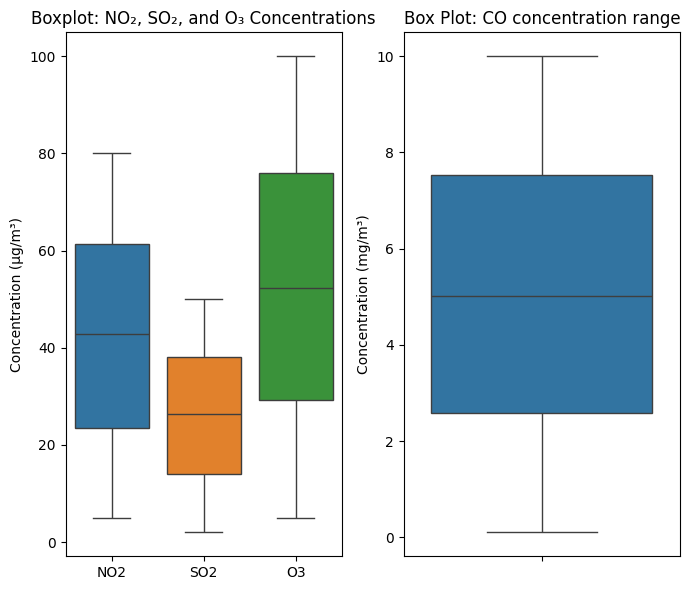

In [80]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(7, 6))

# First subplot: NO₂, SO₂, and O₃ Concentrations
sns.boxplot(data=df[["NO2", "SO2", "O3"]], ax=axes[0])
axes[0].set_title("Boxplot: NO₂, SO₂, and O₃ Concentrations")
axes[0].set_ylabel("Concentration (µg/m³)")

# Second subplot: CO concentrations
sns.boxplot(data=df["CO"], ax=axes[1])
axes[1].set_title("Box Plot: CO concentration range")
axes[1].set_ylabel("Concentration (mg/m³)")

# Adjust layout
plt.tight_layout()
plt.show()

##### Interpretation:
##### As the unit is different for CO (mg/m³) as compared to other pollutants (µg/m³), CO is plotted separately, and the plot shows an average emission of 5 mg/m³. 
##### The boxplot of NO₂, SO₂, and O₃ Concentrations shows that O₃ has the highest variability in concentration. O₃ has been recorded to have the highest outlier concentration (~100 µg/m³) found at Thane city, indicative of pollution events.
##### In case of SO₂ concentrations, there is an outlier at ~ 50 µg/m³ which is recorded at cities such as Thane, Agra, Surat and Chennai. The corresponding Industrial Activity Indices of those cities are relatively high. The outlier correlates with the possible SO₂ emissions due to the prominent industrial activity in those locations.

In [23]:
print(df['CO'].describe())

count    10000.000000
mean         5.045096
std          2.860974
min          0.100010
25%          2.577681
50%          5.019324
75%          7.525486
max          9.999906
Name: CO, dtype: float64


##### Interpretation: To verify the Interquartile range (IQR), whiskers, outliers and median obtained from the boxplot of CO concentration.

In [28]:
# Correlation check:
print(df[['NO2', 'O3', 'CO', 'SO2', 'PM2.5', 'PM10', 'Vehicle Count', 'AQI', 'Industrial Activity Index']].corr())

                                NO2        O3        CO       SO2     PM2.5  \
NO2                        1.000000 -0.003883 -0.016876  0.015858 -0.009516   
O3                        -0.003883  1.000000 -0.014589 -0.002112 -0.007958   
CO                        -0.016876 -0.014589  1.000000  0.009095 -0.002373   
SO2                        0.015858 -0.002112  0.009095  1.000000  0.000530   
PM2.5                     -0.009516 -0.007958 -0.002373  0.000530  1.000000   
PM10                       0.020737  0.011632 -0.008230  0.011923  0.021203   
Vehicle Count              0.002061 -0.020937 -0.008458 -0.011599 -0.015239   
AQI                       -0.005108  0.010431  0.018494 -0.008194  0.008344   
Industrial Activity Index  0.015770  0.000026 -0.005653  0.001399  0.013366   

                               PM10  Vehicle Count       AQI  \
NO2                        0.020737       0.002061 -0.005108   
O3                         0.011632      -0.020937  0.010431   
CO               

##### Interpretation:
##### There is no strong one-on-one correlation between the said quantities, as there are multiple meteorological factors as well that impacts their variarions.

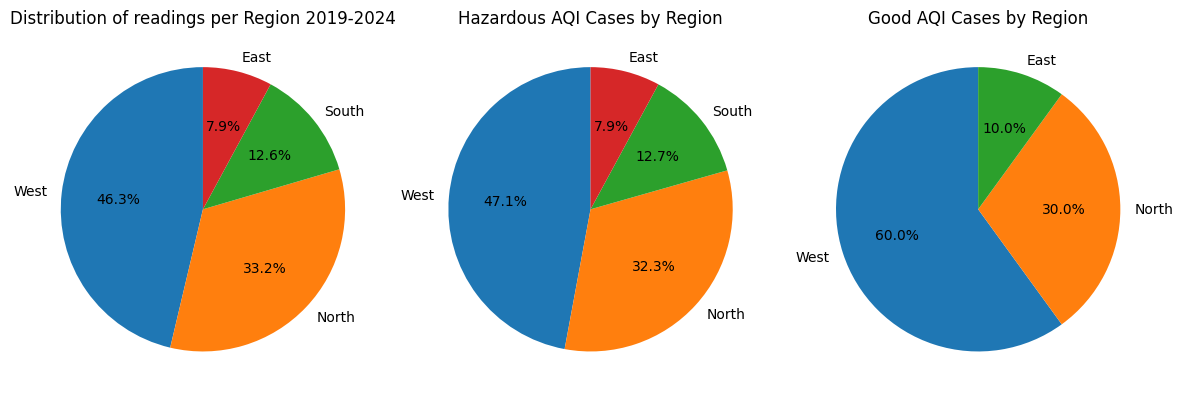

In [113]:
# Subplots: Pie-charts for AQI distribution:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First pie
Count_per_city = df['Region'].value_counts()
axes[0].pie(Count_per_city, labels=Count_per_city.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Distribution of readings per Region 2019-2024")

# Second pie
hazardous_df = df[df["Levels of Health Concern"] == "Hazardous"]
region_counts = hazardous_df["Region"].value_counts()
axes[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Hazardous AQI Cases by Region")

# Third pie
good_df = df[df["Levels of Health Concern"] == "Good"]
region2_counts = good_df["Region"].value_counts()
axes[2].pie(region2_counts, labels=region2_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title("Good AQI Cases by Region")

plt.tight_layout()
plt.show()

##### Interpretation:
##### The count of readings is highest in West region followed by North. Consequently, the number of Hazardous AQI cases also follows the same trend. ##### South Indian cities have no contribution to the AQI readings in the 'Good' level of health concern. 

#### Exploratory Data Analysis (EDA)
#### Bivariate analysis & Multivariate analysis

##### Pivot table : Correlating variables with the mean

In [81]:
pivot = pd.pivot_table(
    df,
    values = ['PM2.5', 'PM10', 'AQI', 'Vehicle Count', 'Industrial Activity Index'],
    index='City',
    aggfunc='mean'
)

print(pivot)

                  AQI  Industrial Activity Index        PM10       PM2.5  \
City                                                                       
Agra       270.477941                   5.036838  160.053264  128.159388   
Ahmedabad  288.756322                   5.218054  168.513585  127.104217   
Bangalore  272.596659                   4.969849  161.893044  132.502160   
Bhopal     265.731156                   5.099432  161.204937  125.806780   
Chennai    274.169451                   5.035075  167.249575  135.061317   
Delhi      269.047745                   4.666584  159.932512  132.049885   
Hyderabad  274.559809                   5.039790  154.341467  126.063329   
Indore     273.719298                   4.958622  159.442488  130.570176   
Jaipur     281.572864                   4.933836  160.744461  134.761844   
Kolkata    283.695444                   4.807014  162.241370  132.734420   
Lucknow    277.361991                   5.042366  163.643324  130.370151   
Ludhiana   2

##### Interpretation:
##### Highest average vehicle count is in Nagpur, and the same city has the highest PM2.5 and PM10, indicating the air pollution impact from vehicles. 
##### Though this exact trend is not replicated in Industrial Activity Index (IAI), the city Surat with highest average IAI has significantly high PM2.5 and PM10. 
##### Though not together correlated, IAI and Vehicle count are individually strongly correlated with the particulate matter in air (PM2.5 and PM10).

In [84]:
df.groupby('City')['PM2.5'].agg(['mean', 'min', 'max', 'std'])

,mean,min,max,std
City,,,,
Agra,128.159388,10.100289,249.773708,67.339038
Ahmedabad,127.104217,10.074753,248.904415,72.678021
Bangalore,132.502160,10.250614,249.589634,68.182064
Bhopal,125.806780,10.666401,249.992913,69.961133
Chennai,135.061317,10.180620,249.848569,68.225801
Delhi,132.049885,10.733701,249.996746,67.922939
Hyderabad,126.063329,10.090199,249.875428,69.183202
Indore,130.570176,11.675193,247.990614,69.347220
Jaipur,134.761844,10.099681,249.856437,68.727394


##### Interpretation:
##### The consistent standard deviation values across the cities signify that the spread of data/ amount of fluctuation in PM2.5 levels is uniform.
##### A similar trend is observed in the maximum and minimum values as well.

In [48]:
df.groupby('City')['PM10'].agg(['mean', 'min', 'max', 'std'])

,mean,min,max,std
City,,,,
Agra,160.053264,20.145425,299.444984,78.477369
Ahmedabad,168.513585,21.645807,299.888548,81.888324
Bangalore,161.893044,20.293034,298.521511,84.000960
Bhopal,161.204937,21.024454,297.213718,81.207742
Chennai,167.249575,20.555915,299.519708,79.178027
Delhi,159.932512,20.415719,298.125765,80.269776
Hyderabad,154.341467,20.572940,299.619995,83.291366
Indore,159.442488,20.776603,298.555838,80.035496
Jaipur,160.744461,20.257404,299.445899,81.721723


##### Interpretation:
##### The consistent standard deviation values across the cities signify that the spread of data/ amount of fluctuation in PM10 levels is uniform.
##### A similar trend is observed in the maximum and minimum values as well.

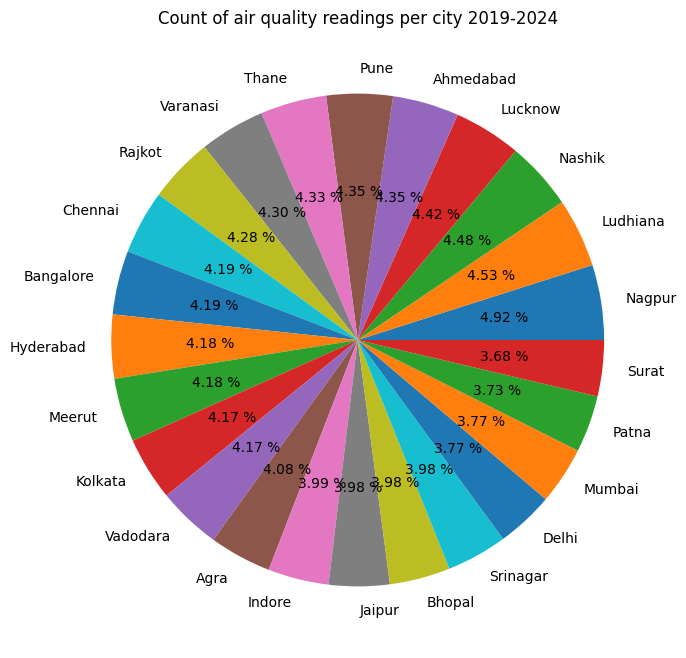

In [89]:
Count_per_city = df['City'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(Count_per_city, labels=Count_per_city.index, autopct='%.2f %%')
plt.title('Count of air quality readings per city 2019-2024')
plt.show()

##### Interpretation:
##### Out of 10000 readings taken across 24 cities, Nagpur is the city that has the largest number of readings taken, whereas Surat has the lowest.

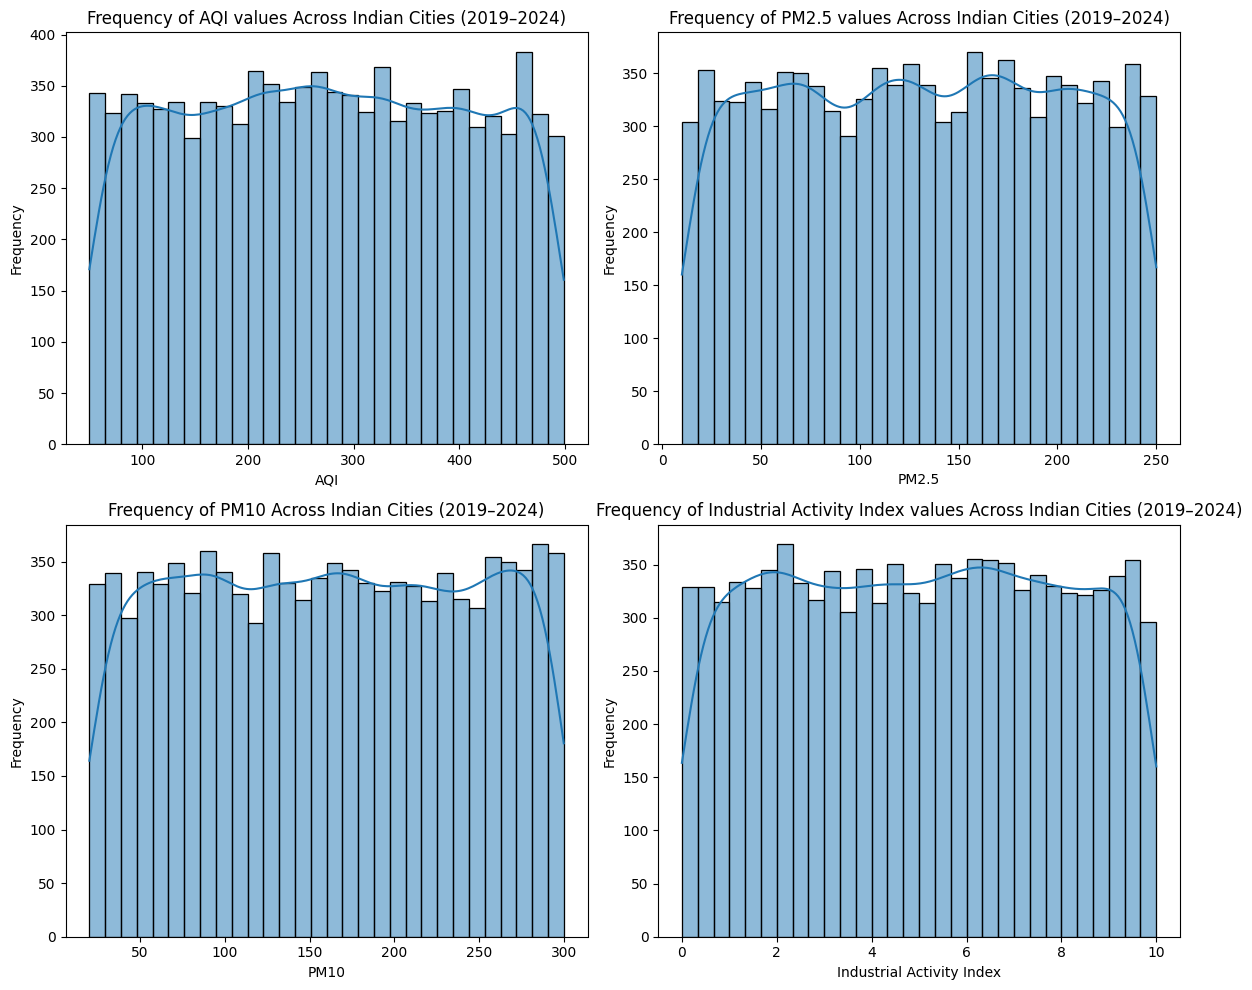

In [91]:
# Subplots: Frequency of value ranges for AQI, PM2.5, PM10 and Industrial Activity Index:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (0,0)
sns.histplot(df["AQI"], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Frequency of AQI values Across Indian Cities (2019–2024)")
axes[0,0].set_xlabel("AQI")
axes[0,0].set_ylabel("Frequency")


# (0,1)
sns.histplot(df["PM2.5"], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Frequency of PM2.5 values Across Indian Cities (2019–2024)")
axes[0,1].set_xlabel("PM2.5")
axes[0,1].set_ylabel("Frequency")

# (1,0)
sns.histplot(df["PM10"], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Frequency of PM10 Across Indian Cities (2019–2024)")
axes[1,0].set_xlabel("PM10")
axes[1,0].set_ylabel("Frequency")

# (1,1)
sns.histplot(df["Industrial Activity Index"], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Frequency of Industrial Activity Index values Across Indian Cities (2019–2024)")
axes[1,1].set_xlabel("Industrial Activity Index")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##### Interpretation:
##### The frequency of different value ranges of AQI, PM2.5, PM10 and Industrial Activity Index is visualized to check for central tendency (if any). As the histograms represent similar heights, unlike a normal distribution (with a peak), the dataset has no strong central tendency. Data is evenly spread across the range and every interval is almost equally likely.

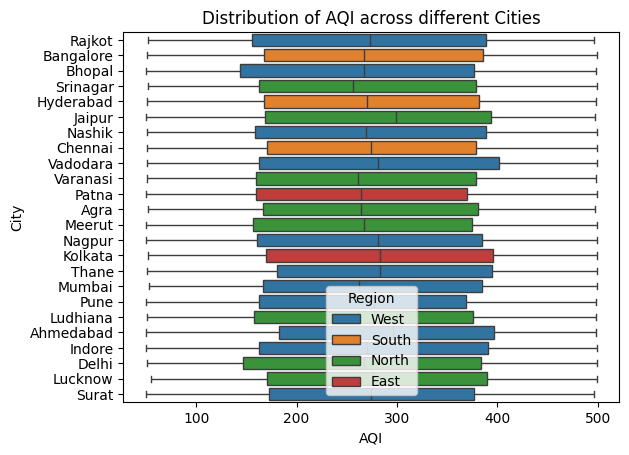

In [249]:
# Boxplot visualizing the distribution of AQI across different cities:

sns.boxplot(data=df, x='AQI', y='City', hue='Region')
plt.title('Distribution of AQI across different Cities')
plt.xlabel('AQI')
plt.ylabel('City')
plt.show()

##### Interpretation:
##### The most occurring range of AQI lies between 150 to 400, across all cities. This range of AQI has the levels of health concern under Unhealthy to Hazardous zone.

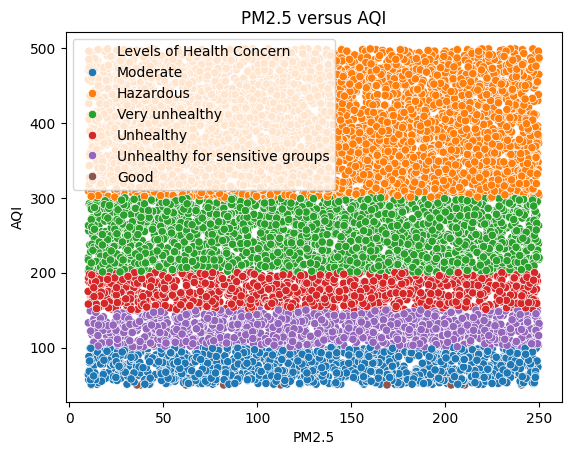

In [258]:
# Scatter plot: PM2.5 versus AQI:

sns.scatterplot(data=df, x='PM2.5', y='AQI', hue='Levels of Health Concern')
plt.title('PM2.5 versus AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

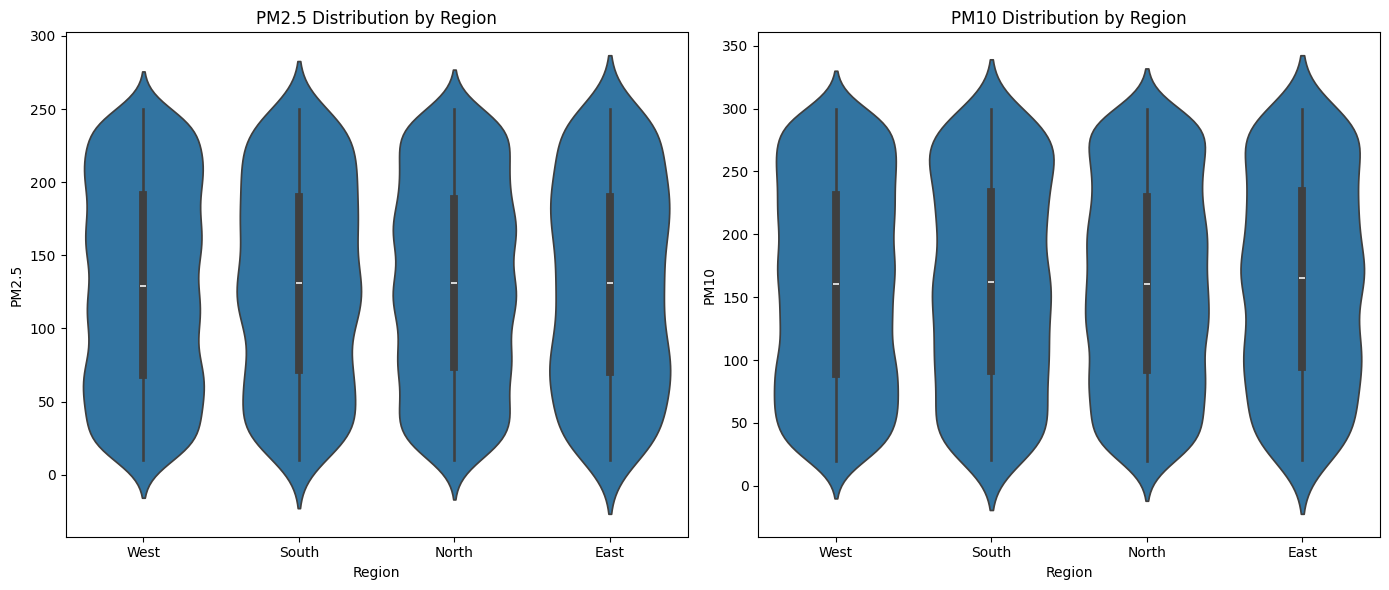

In [205]:
# Violin plots: Sub-plots PM2.5 and PM10:

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.violinplot(data=df, x="Region", y="PM2.5", ax=axes[0])
axes[0].set_title("PM2.5 Distribution by Region")

sns.violinplot(data=df, x="Region", y="PM10", ax=axes[1])
axes[1].set_title("PM10 Distribution by Region")

plt.tight_layout()
plt.show()

##### Interpretation:
##### The PM2.5 and PM10 value ranges do not show much variability across the regions.

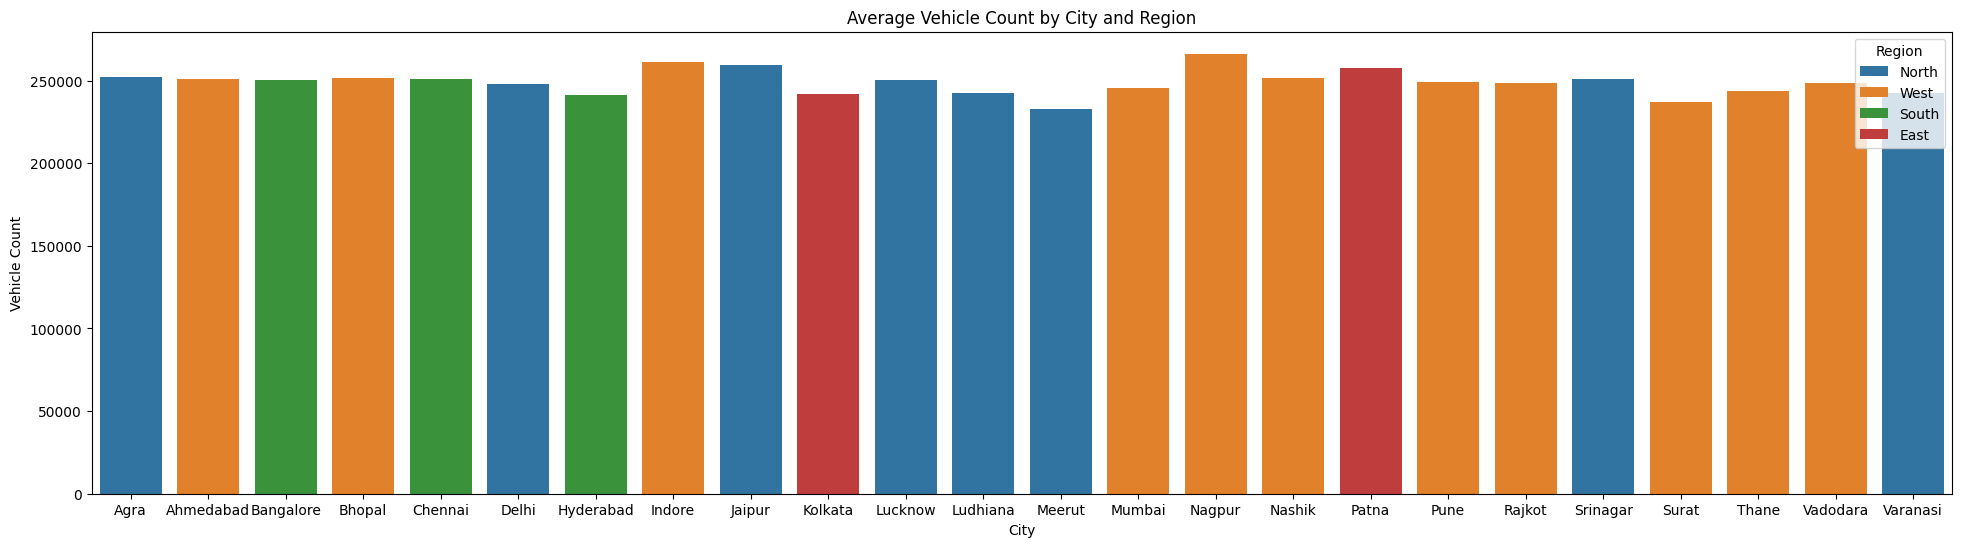

In [206]:
# Barplot to visualize the vehicle count average:
plt.figure(figsize=(24, 6))
avg_vehicle_count = df.groupby(['City', 'Region'])['Vehicle Count'].mean().reset_index()
sns.barplot(data=avg_vehicle_count, x='City', y='Vehicle Count', hue='Region')
plt.title('Average Vehicle Count by City and Region')
plt.show()

#### Exploring the impact of meteorological factors on the Indian air quality:

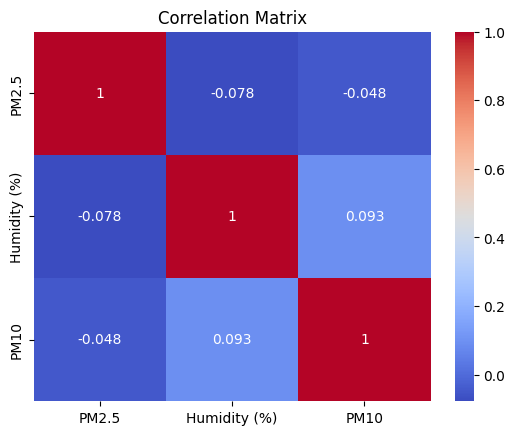

In [198]:
# Correlation Matrix between PM2.5, PM10 and Humidity (%) using a heatmap:
Rajkot_data = df[df["City"] == "Rajkot"]
corr_cols = ['PM2.5', 'Humidity (%)', 'PM10']  
corr_matrix = Rajkot_data[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Interpretation:
##### As humidity increases, PM10 levels at Rajkot also tend to increase slightly, but not strongly (~0.1 correlation factor). 
##### At high humidity, PM10 (larger particles like dust, ash, pollen) can absorb water, swell, and stay suspended longer instead of settling. Humid air is often denser and associated with low wind speeds, reducing pollutant dispersion, so particles accumulate.
##### The relationship is weak, so humidity alone does not fully explain PM10 variations—other factors (traffic, industry, wind, rainfall) likely dominate.

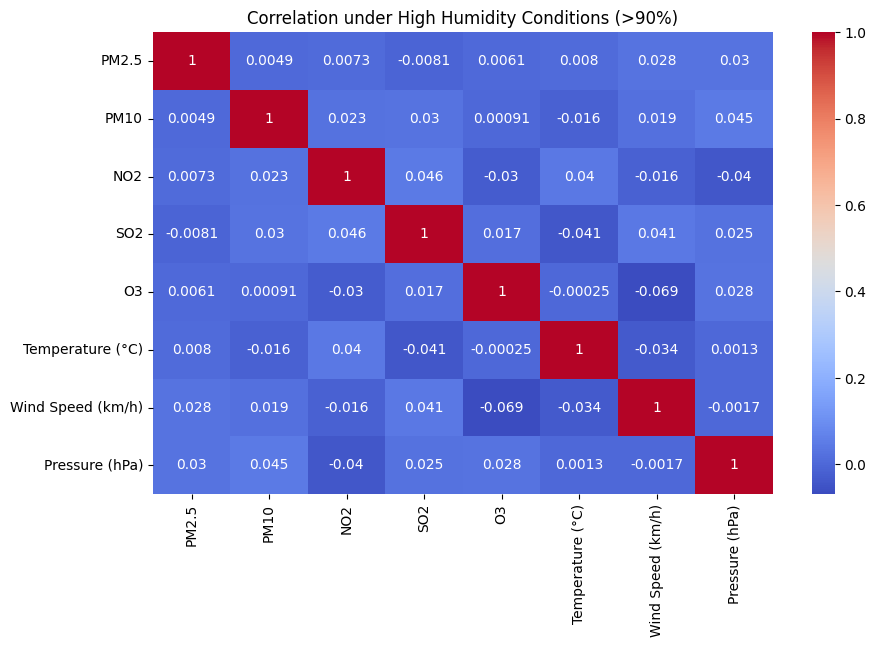

In [201]:
# Correlations under Humidity threshold:
high_humidity_df = df[df['Humidity (%)'] > 90]
plt.figure(figsize=(10,6))
corr = high_humidity_df[['PM2.5','PM10','NO2','SO2','O3','Temperature (°C)','Wind Speed (km/h)','Pressure (hPa)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation under High Humidity Conditions (>90%)")
plt.show()

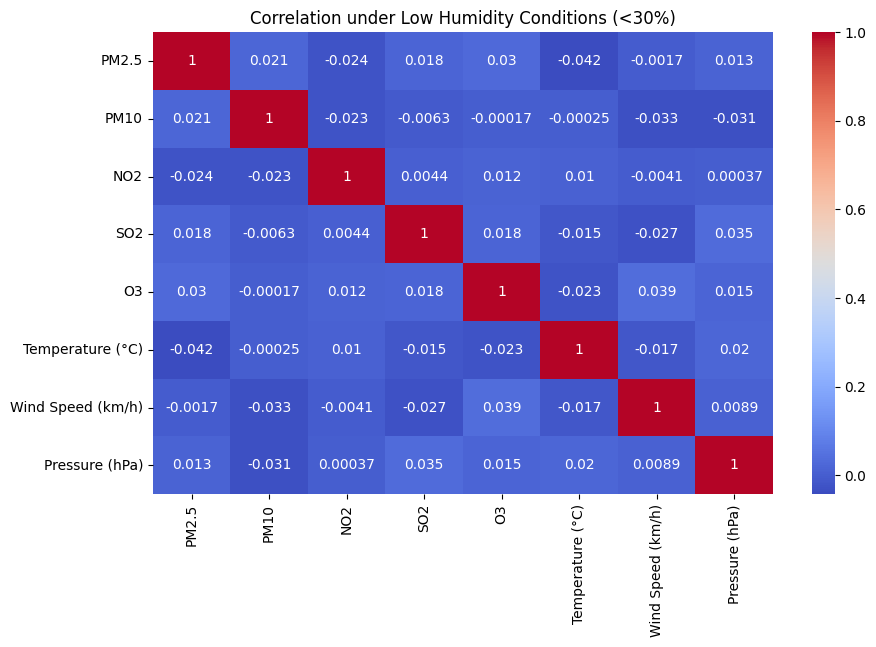

In [202]:
# Correlations under Humidity threshold:
low_humidity_df = df[df['Humidity (%)'] < 30]
plt.figure(figsize=(10,6))
corr = low_humidity_df[['PM2.5','PM10','NO2','SO2','O3','Temperature (°C)','Wind Speed (km/h)','Pressure (hPa)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation under Low Humidity Conditions (<30%)")
plt.show()

##### Interpretation:
##### There is no strong one-on-one correlation between the said variables under low humidity or high humidity thresholds.

#### Deep exploration of Delhi (being a city of chronic air pollution events) air quality readings and trends:

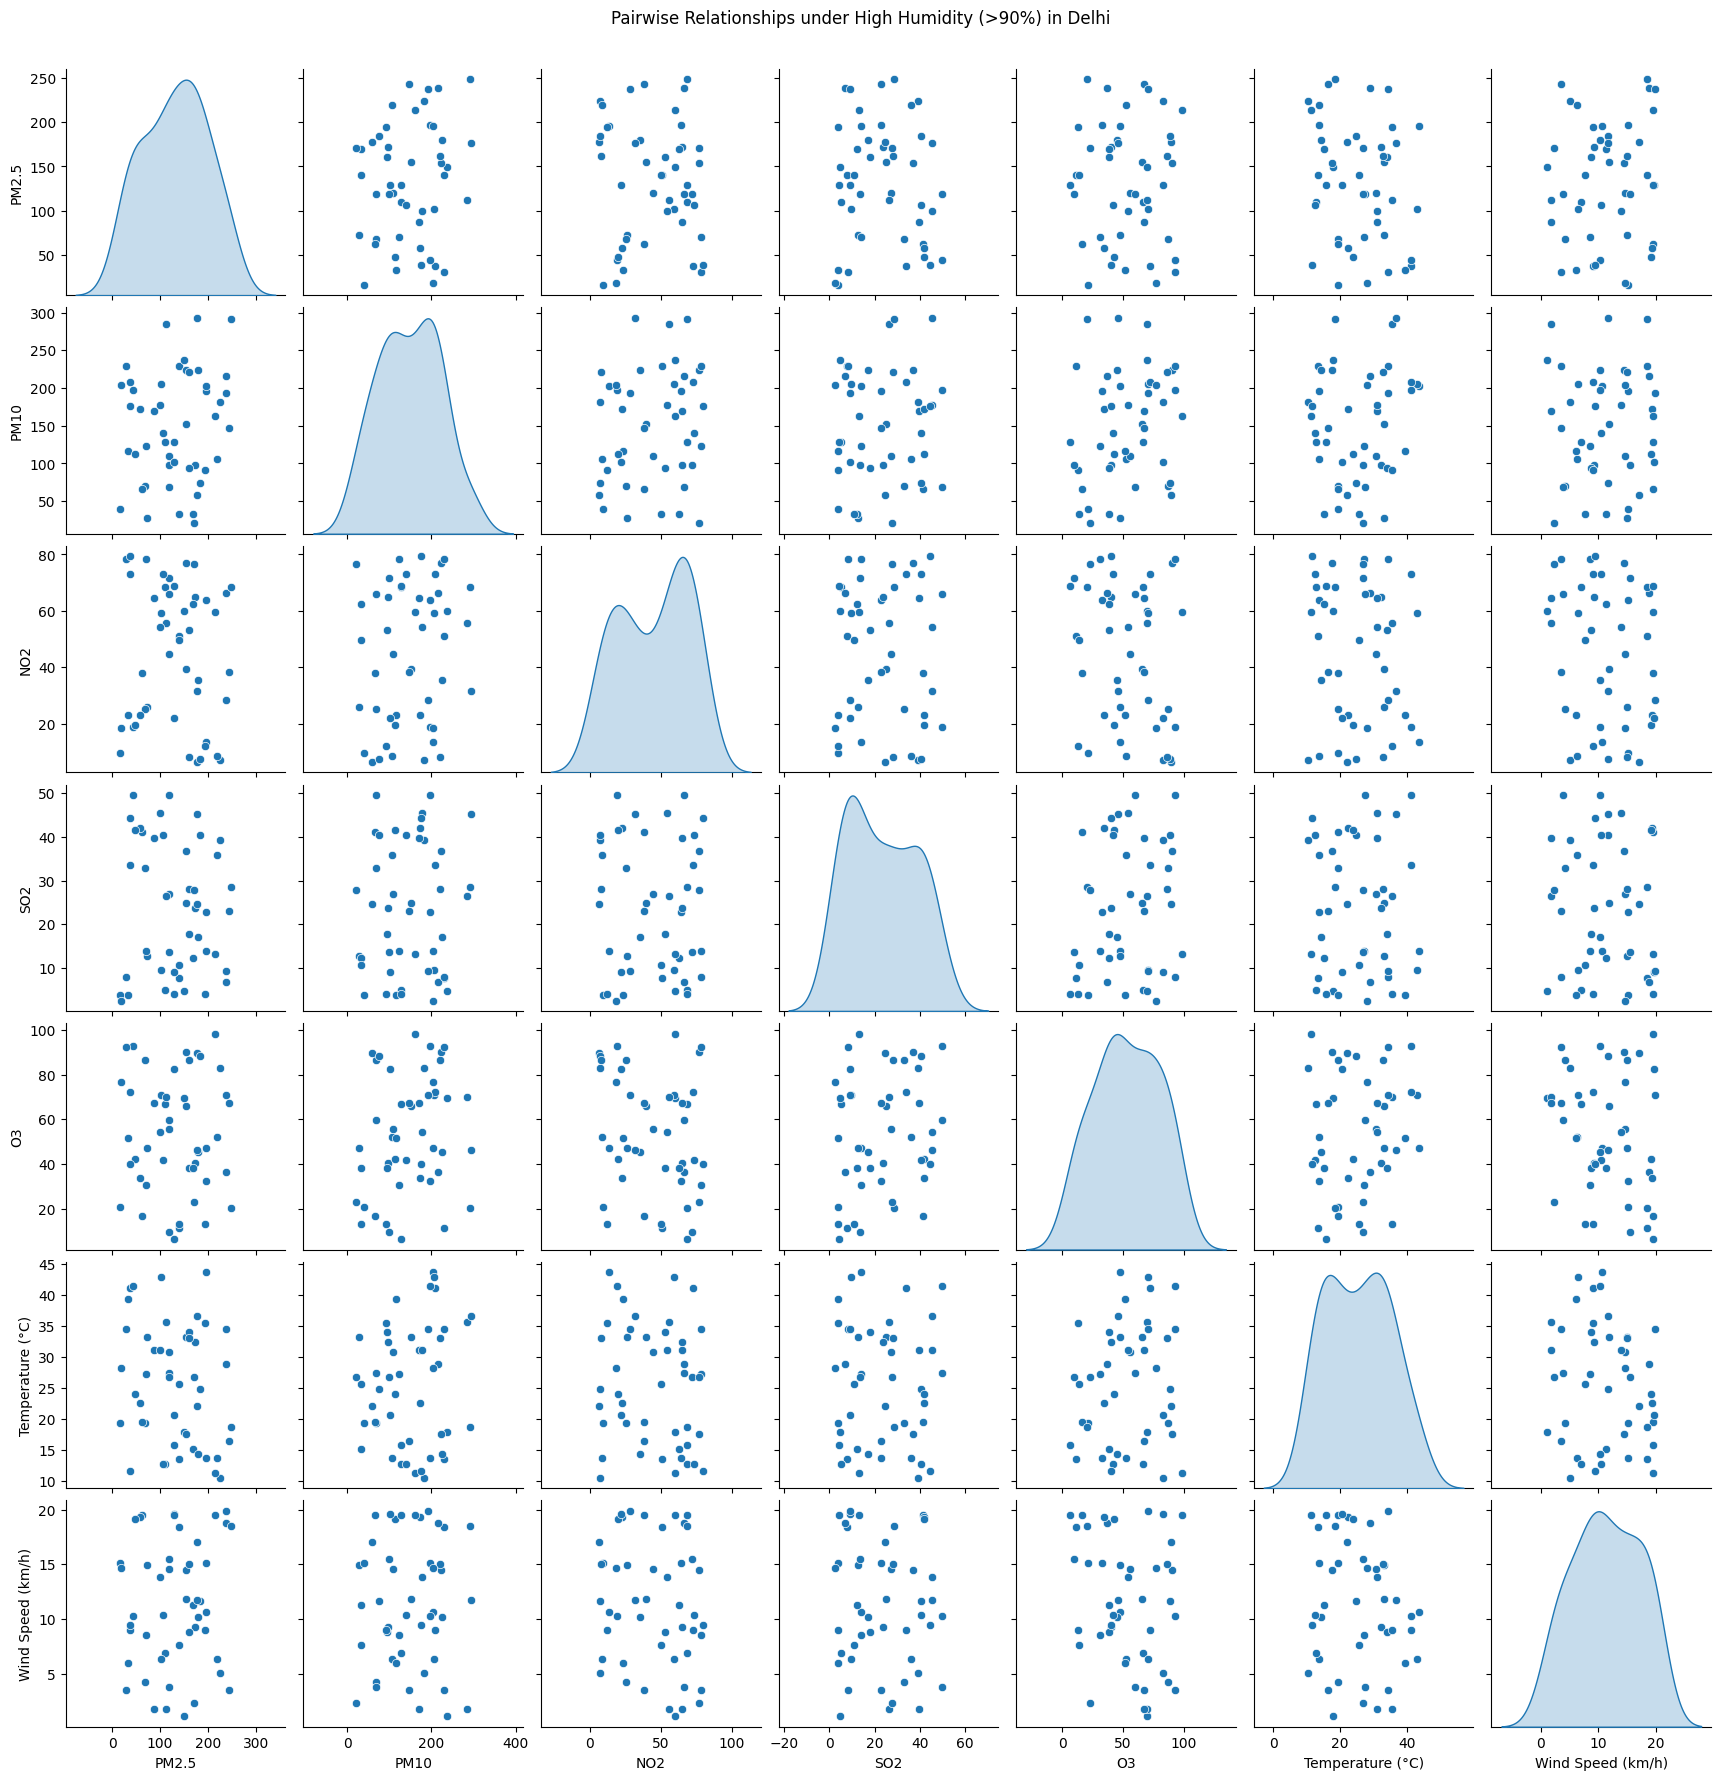

In [261]:
# Pair-plots (Multivariate analysis):
# Pairwise Relationships under High Humidity (>90%) in Delhi:
high_humidity_df = df[(df['City'] == 'Delhi') & (df['Humidity (%)'] > 90)]
sns.pairplot(high_humidity_df[['PM2.5','PM10','NO2','SO2','O3','Temperature (°C)','Wind Speed (km/h)']], diag_kind="kde")
plt.suptitle("Pairwise Relationships under High Humidity (>90%) in Delhi", y=1.02)
plt.show()

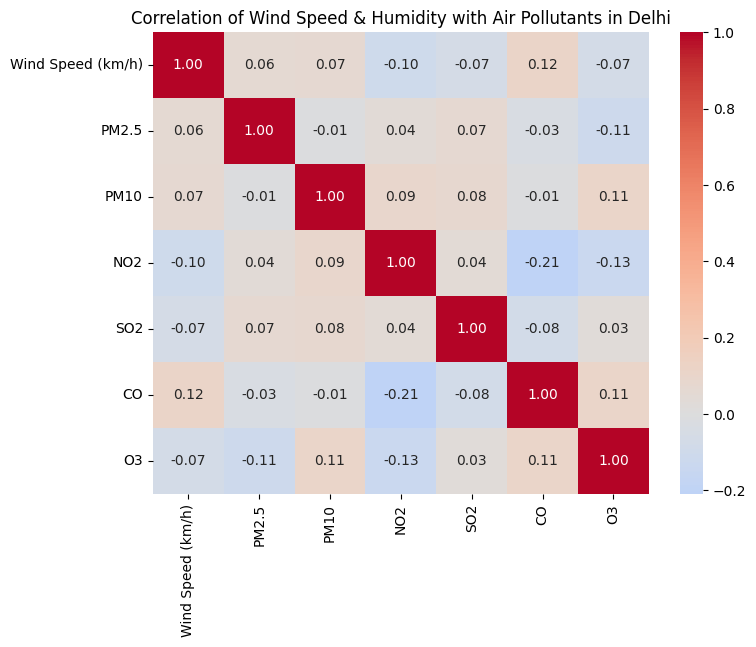

In [259]:
# Correlation of Wind Speed & Humidity with Air Pollutants in Delhi:

import matplotlib.pyplot as plt
import seaborn as sns

Delhi_data = df[(df['City'] == 'Delhi') & (df['Humidity (%)'] > 50)]

cols = ['Wind Speed (km/h)', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
corr = Delhi_data[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation of Wind Speed & Humidity with Air Pollutants in Delhi")
plt.show()

##### Interpretation:
##### In humid conditions (>50% in Delhi), NO₂ reacts with hydroxyl radicals (OH·) and water vapor to form nitric acid (HNO₃), reducing its levels.
##### CO, on the other hand, is relatively stable and oxidizes more slowly (via OH· radicals), as Delhi is an area of chronic air pollution.
##### Higher wind speeds dilute local NO₂, dispersing it over a larger area, resulting in a weak negative correlation.

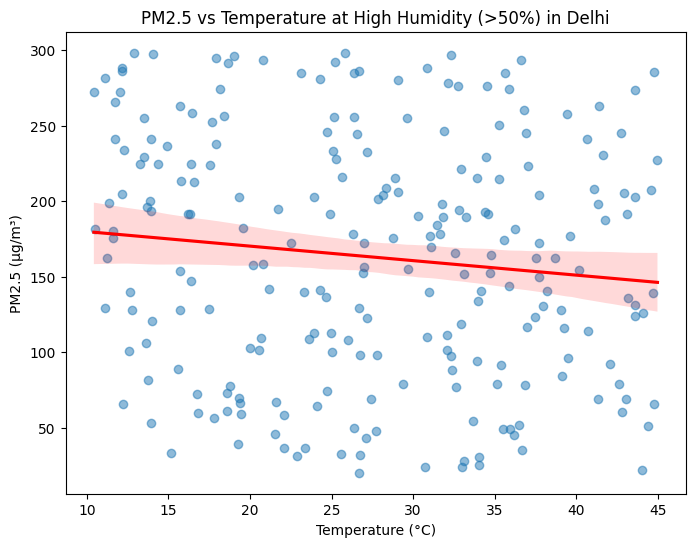

Correlation between PM2.5 and Temperature in Delhi (High Humidity): -0.11929724280404679


In [260]:
# Regplot: To check for the impact of meteorological factors on Delhi air quality:

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for one city under high humidity conditions
city_data = df[(df['City'] == 'Delhi') & (df['Humidity (%)'] > 50)]

# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(data=city_data, x='Temperature (°C)', y='PM10', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('PM2.5 vs Temperature at High Humidity (>50%) in Delhi')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

# Calculate correlation
corr = city_data['PM10'].corr(city_data['Temperature (°C)'])
print("Correlation between PM2.5 and Temperature in Delhi (High Humidity):", corr)

##### Interpretation:
##### High humidity often leads to water condensation on particles, forming larger droplets. These droplets settle faster, reducing PM2.5 concentration. This dispersion is enhanced at warmer temperatures.
##### This is signified by the weak negative correlation of PM2.5 with temperature during the high humid conditions in Delhi, i.e. when the relative humidity is above 50%. 

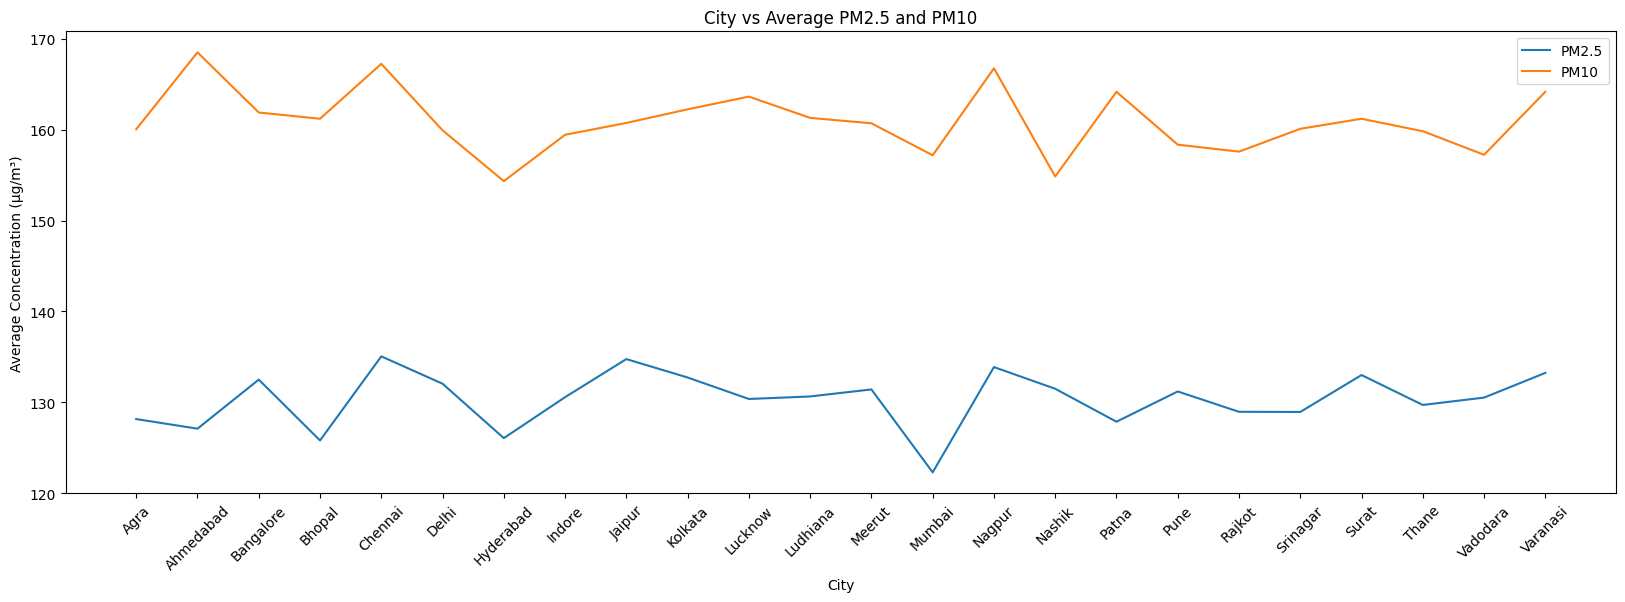

In [208]:
# Line-plot to visualize the average PM2.5 and PM10 levels per city:
avg_city = df.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()

# Plot both in the same line chart
plt.figure(figsize=(20, 6))
sns.lineplot(data=avg_city, x='City', y='PM2.5', label='PM2.5')
sns.lineplot(data=avg_city, x='City', y='PM10', label='PM10')

plt.title('City vs Average PM2.5 and PM10')
plt.xlabel('City')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### Interpretation:
##### Ahmedabad, Chennai and Nagpur have spikes in PM10 levels relative to the other cities.
##### Mumbai shows a steep fall in PM2.5 levels relative to the other cities.

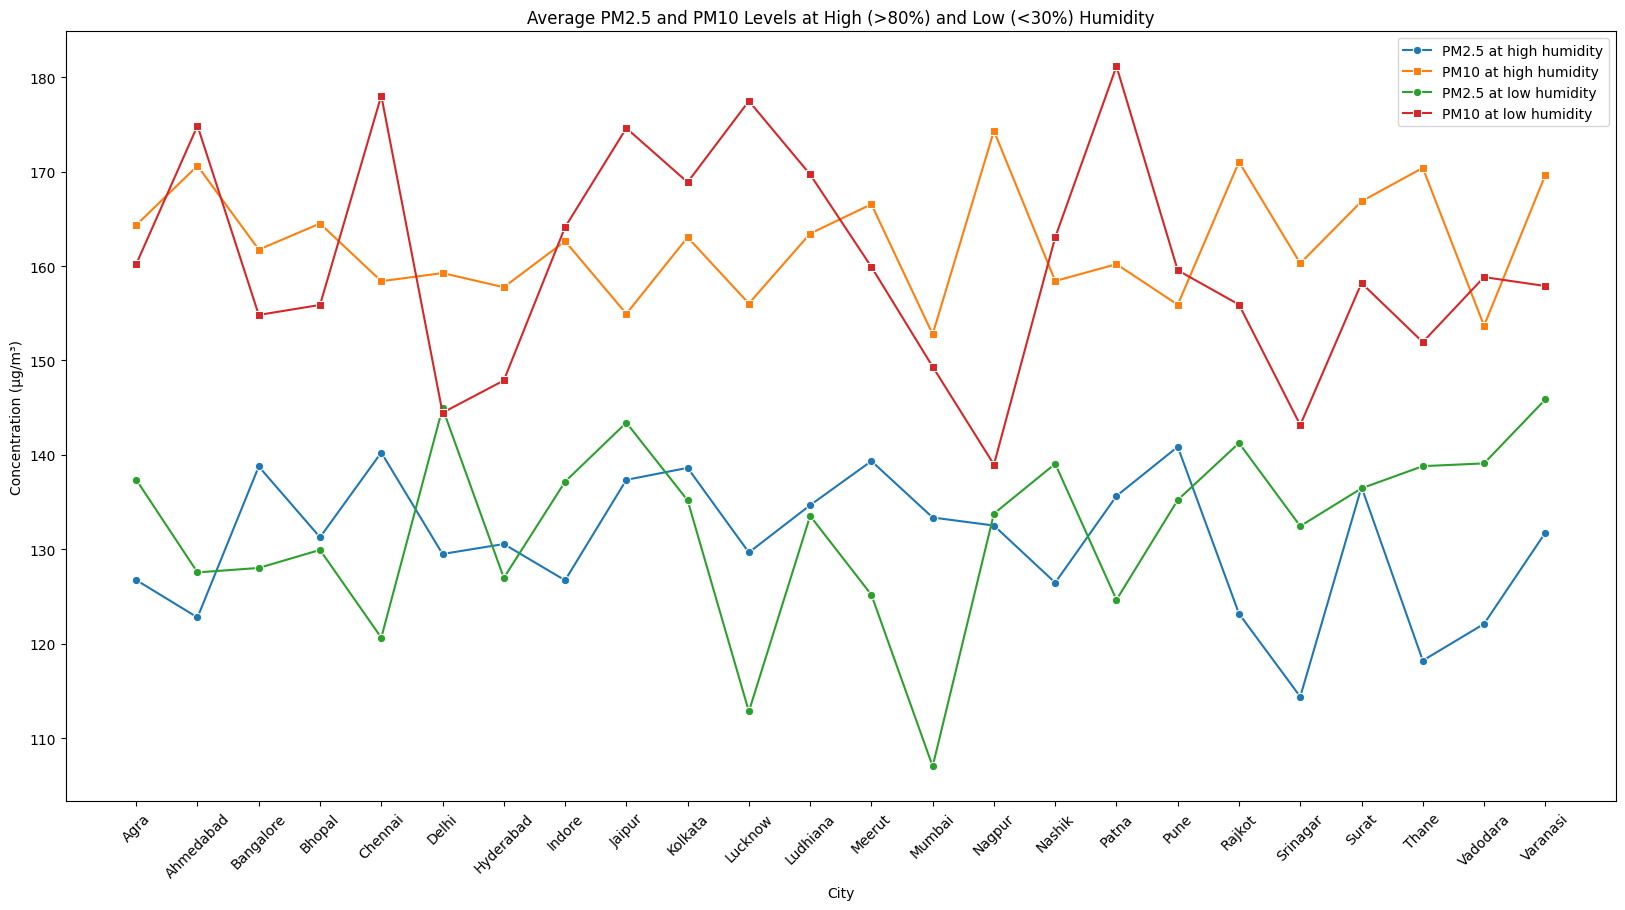

In [182]:
high_humidity_data = df[df['Humidity (%)'] >= 80]
low_humidity_data = df[df['Humidity (%)'] <= 30]

# Calculate average PM2.5 and PM10 in this high humidity range (city-wise)
avg_high_humidity = high_humidity_data.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()
avg_low_humidity = low_humidity_data.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()

# Side by side Line plots:
plt.figure(figsize=(20, 10))

sns.lineplot(data=avg_high_humidity, x='City', y='PM2.5', marker='o', label='PM2.5 at high humidity')
sns.lineplot(data=avg_high_humidity, x='City', y='PM10', marker='s', label='PM10 at high humidity')
sns.lineplot(data=avg_low_humidity, x='City', y='PM2.5', marker='o', label='PM2.5 at low humidity')
sns.lineplot(data=avg_low_humidity, x='City', y='PM10', marker='s', label='PM10 at low humidity')

plt.title("Average PM2.5 and PM10 Levels at High (>80%) and Low (<30%) Humidity")
plt.xlabel("City")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

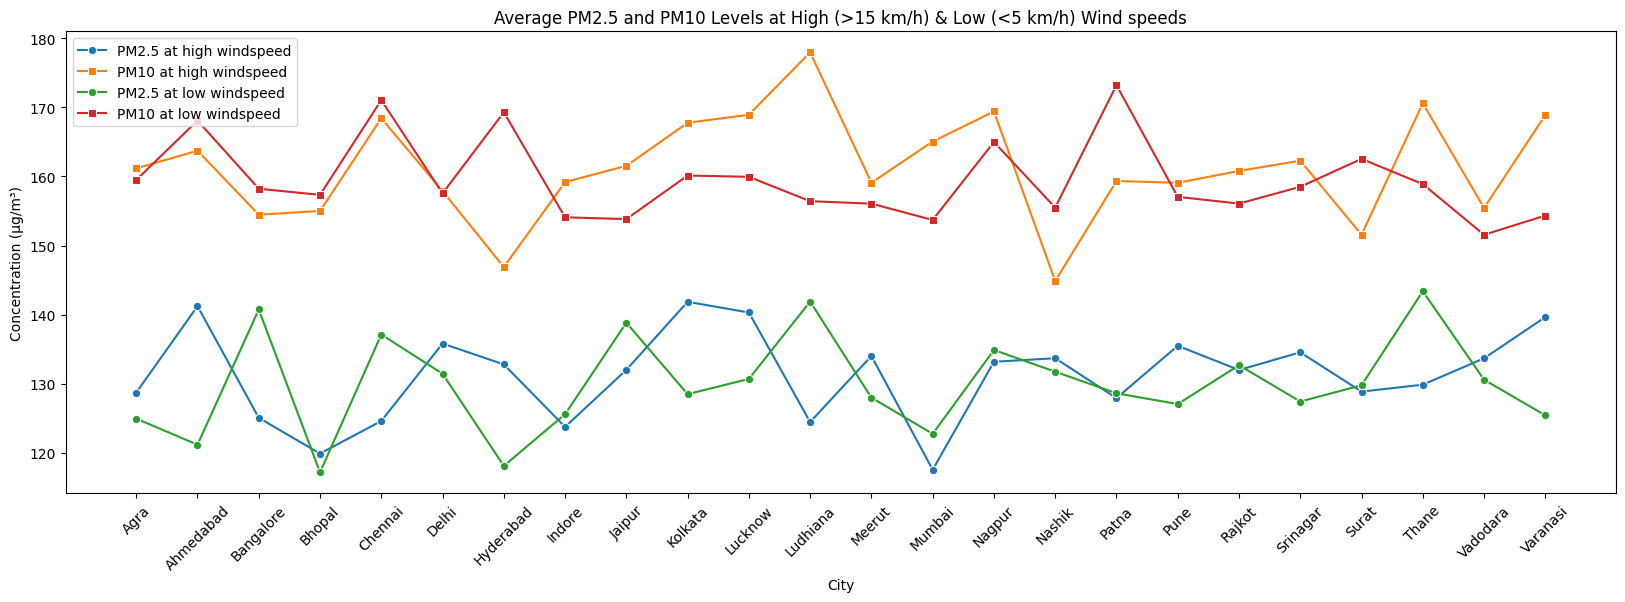

In [179]:
# Impact of Wind Speed on PM2.5 and PM10 levels:

high_windspeed_data = df[df['Wind Speed (km/h)'] >= 15]
low_windspeed_data = df[df['Wind Speed (km/h)'] <= 5]

# Calculate average PM2.5 and PM10 in this high windspeed range (city-wise)
avg_high_windspeed = high_windspeed_data.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()
avg_low_windspeed = low_windspeed_data.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()

# Side by side Line plots:
plt.figure(figsize=(20, 6))
sns.lineplot(data=avg_high_windspeed, x='City', y='PM2.5', marker='o', label='PM2.5 at high windspeed')
sns.lineplot(data=avg_high_windspeed, x='City', y='PM10', marker='s', label='PM10 at high windspeed')

sns.lineplot(data=avg_low_windspeed, x='City', y='PM2.5', marker='o', label='PM2.5 at low windspeed')
sns.lineplot(data=avg_low_windspeed, x='City', y='PM10', marker='s', label='PM10 at low windspeed')

plt.title("Average PM2.5 and PM10 Levels at High (>15 km/h) & Low (<5 km/h) Wind speeds")
plt.xlabel("City")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

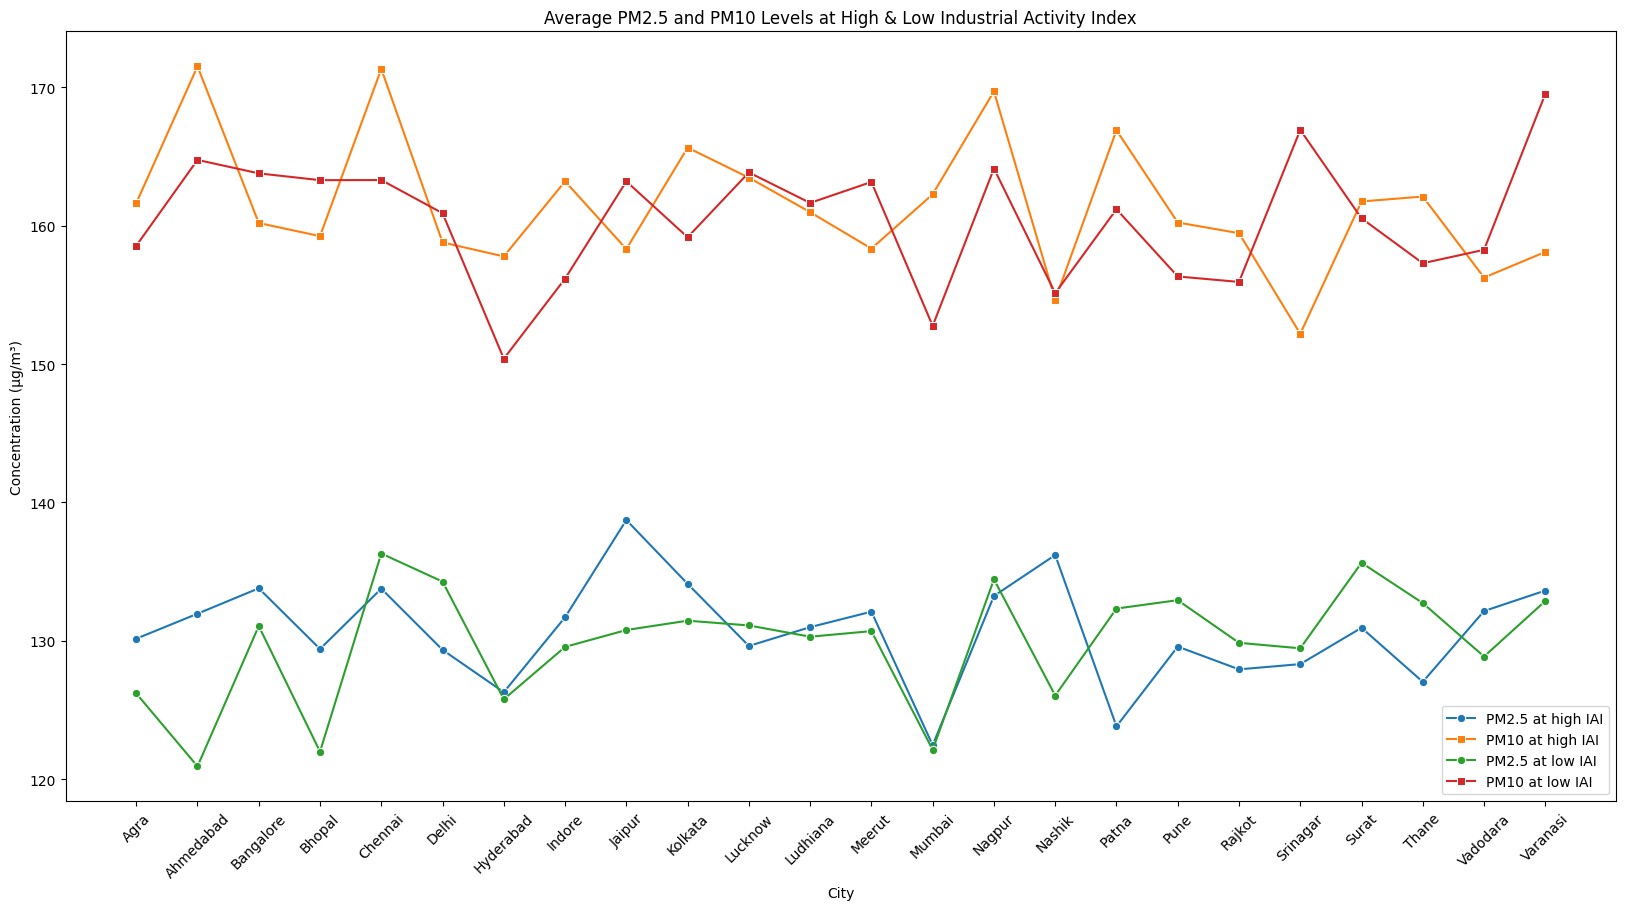

In [234]:
# Impact of Industrial Activity on PM2.5 and PM10 levels:

high_IAI_data = df[df['Industrial Activity Index'] >= 5]
low_IAI_data = df[df['Industrial Activity Index'] <= 5]

# Calculate average PM2.5 and PM10 in this high windspeed range (city-wise)
avg_high_IAI = high_IAI_data.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()
avg_low_IAI = low_IAI_data.groupby('City')[['PM2.5', 'PM10']].mean().reset_index()

# Side by side Line plots:
plt.figure(figsize=(20, 10))
sns.lineplot(data=avg_high_IAI, x='City', y='PM2.5', marker='o', label='PM2.5 at high IAI')
sns.lineplot(data=avg_high_IAI, x='City', y='PM10', marker='s', label='PM10 at high IAI')

sns.lineplot(data=avg_low_IAI, x='City', y='PM2.5', marker='o', label='PM2.5 at low IAI')
sns.lineplot(data=avg_low_IAI, x='City', y='PM10', marker='s', label='PM10 at low IAI')

plt.title("Average PM2.5 and PM10 Levels at High & Low Industrial Activity Index")
plt.xlabel("City")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### Interpretation:
##### The cities (Eg: Hyderabad, Mumbai) which are predominantly affected by the PM10 levels due to Industrial activity, are indicated by the steep falls in PM10 levels (red line- at low IAI).
##### The cities (Eg: Ahmedabad, Bhopal) which are predominantly affected by the PM2.5 levels due to Industrial activity, are indicated by the steep falls in PM2.5 levels (green line- at low IAI).

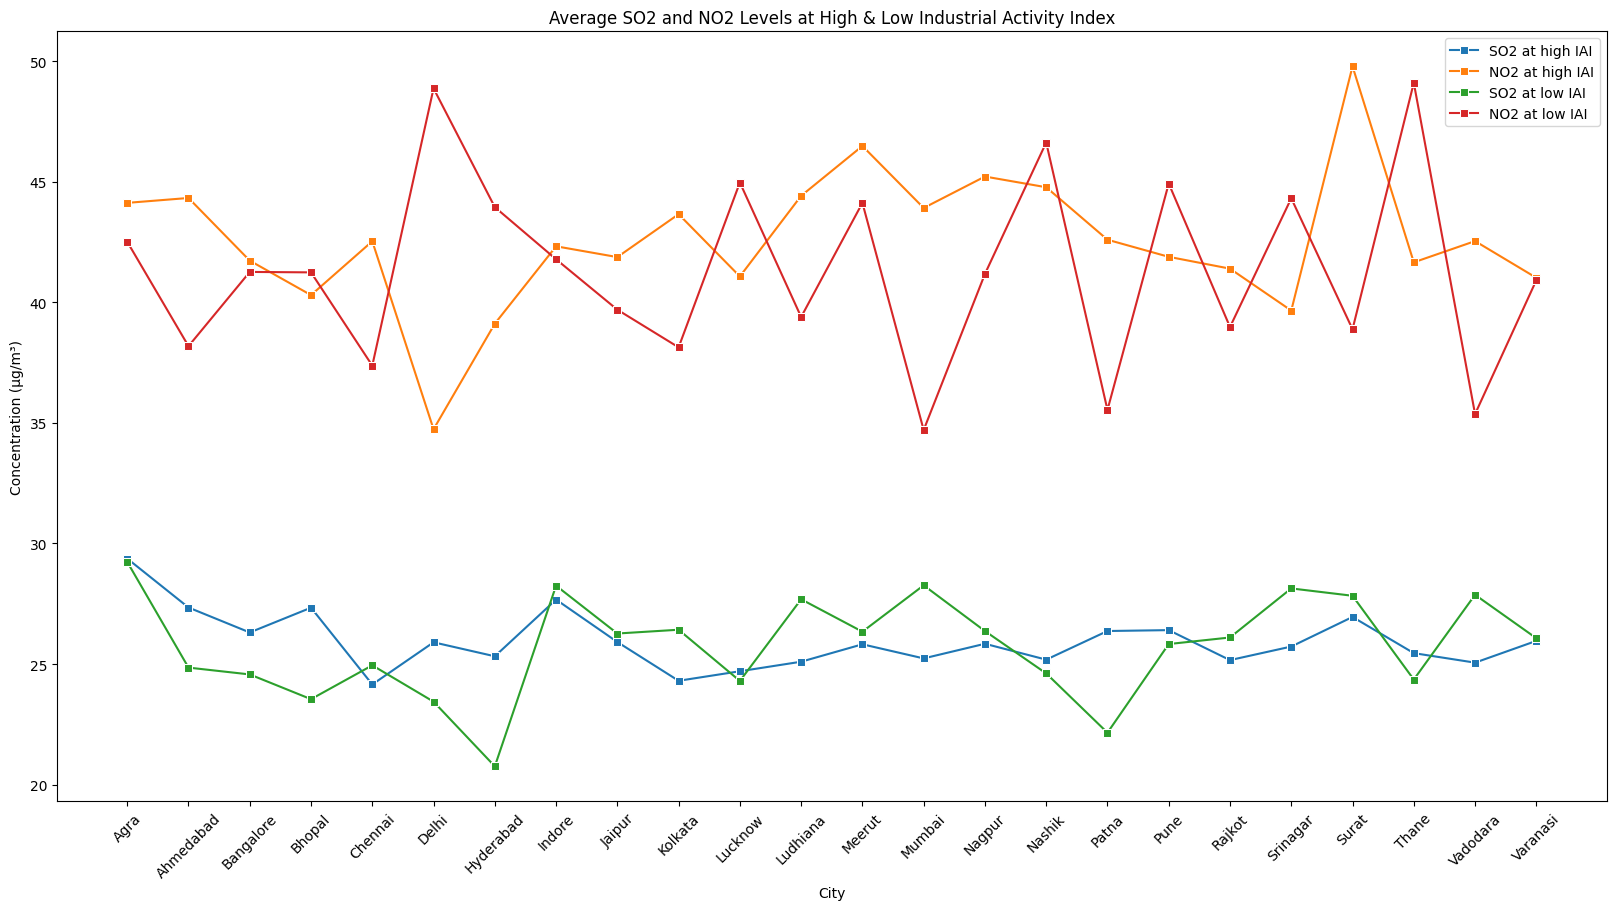

In [247]:
# Impact of Industrial Activity on SO2 and NO2 levels:

plt.figure(figsize=(20, 10))
high_IAI_data = df[df['Industrial Activity Index'] >= 8]
low_IAI_data = df[df['Industrial Activity Index'] <= 1]

avg_high_IAI = high_IAI_data.groupby('City')[['NO2', 'SO2']].mean().reset_index()
avg_low_IAI = low_IAI_data.groupby('City')[['NO2', 'SO2']].mean().reset_index()

sns.lineplot(data=avg_high_IAI, x='City', y='SO2', marker='s', label='SO2 at high IAI')
sns.lineplot(data=avg_high_IAI, x='City', y='NO2', marker='s', label='NO2 at high IAI')

sns.lineplot(data=avg_low_IAI, x='City', y='SO2', marker='s', label='SO2 at low IAI')
sns.lineplot(data=avg_low_IAI, x='City', y='NO2', marker='s', label='NO2 at low IAI')

plt.title("Average SO2 and NO2 Levels at High & Low Industrial Activity Index")
plt.xlabel("City")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### Interpretation:
##### The cities (Eg: Mumbai, Patna, Vadodara, Chennai etc.) which are predominantly affected by the NO2 emission from Industrial activity are indicated by the steep falls in NO2 levels (red line- at low IAI).
##### The cities (Eg: Hyderabad, Patna) which are predominantly affected by the SO2 emission from Industrial activity are indicated by the steep falls in SO2 levels (green line- at low IAI).

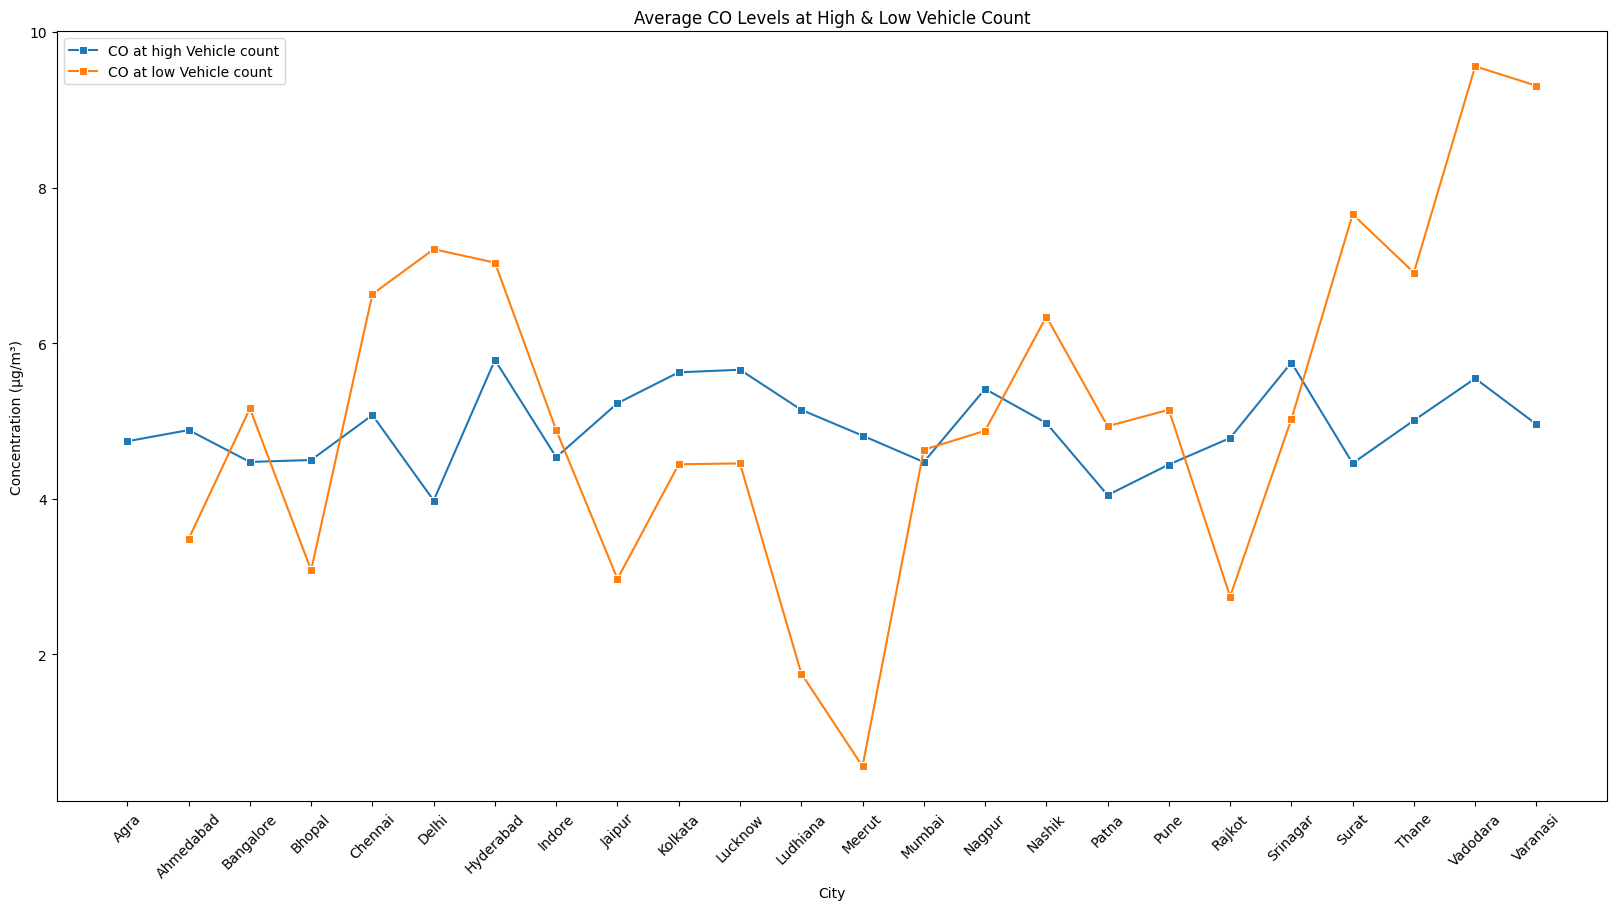

In [248]:
# Impact of Vehicle count on CO levels:

plt.figure(figsize=(20, 10))
high_IAI_data = df[df['Vehicle Count'] >= 450000]
low_IAI_data = df[df['Vehicle Count'] <= 5000]

avg_high_IAI = high_IAI_data.groupby('City')['CO'].mean().reset_index()
avg_low_IAI = low_IAI_data.groupby('City')['CO'].mean().reset_index()

sns.lineplot(data=avg_high_IAI, x='City', y='CO', marker='s', label='CO at high Vehicle count')

sns.lineplot(data=avg_low_IAI, x='City', y='CO', marker='s', label='CO at low Vehicle count')

plt.title("Average CO Levels at High & Low Vehicle Count")
plt.xlabel("City")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### Interpretation:
##### The cities (Eg: Bhopal, Jaipur, Ludhiana, Meerut, Rajkot etc.) which are predominantly affected by the CO emission from vehicles are indicated by the steep falls in CO levels (orange line- at low vehicle counts).